# Reducción de dimensionalidad / PCA 2 (Core)

## Descripción:

En esta actividad, utilizarás el Análisis de Componentes Principales (PCA) para visualizar datos en un espacio de menor dimensionalidad. Trabajarás con el famoso dataset «Iris» para reducir sus características a dos componentes principales y visualizar cómo se distribuyen las diferentes clases en este nuevo espacio de características.

Enlace al dataset: https://www.kaggle.com/uciml/iris

## Objetivo:

El objetivo es reducir la dimensionalidad del dataset «Iris» mediante PCA, visualizando las clases en el nuevo espacio bidimensional y evaluando si los componentes principales son capaces de capturar adecuadamente la variabilidad de los datos.

## Instrucciones:

### 1. Carga de datos:

* Descarga el dataset «Iris» de Kaggle. Examina las características disponibles, que incluyen el largo y ancho de los sépalos y pétalos de tres especies de flores.
* Asegúrate de que los datos no contengan valores nulos o atípicos.

### 2. Exploración y preprocesamiento de datos:

* Realiza una normalización de los datos, ya que PCA requiere que las características tengan la misma escala para funcionar de manera efectiva.
* Observa la distribución inicial de las variables mediante gráficos de dispersión o histogramas.

### 3. Aplicación de PCA:

* Implementa PCA para reducir las cuatro dimensiones del dataset «Iris» a solo dos componentes principales.
* Calcula la «explained variance» para estos dos componentes y discute qué porcentaje de la variabilidad total de los datos está capturada en el espacio bidimensional.

### 4. Visualización de los componentes principales:

* Proyecta los datos en el espacio bidimensional formado por los dos primeros componentes principales.
* Utiliza diferentes colores para representar cada una de las tres clases de flores en el gráfico y observa cómo se agrupan las clases en el espacio de los componentes principales.

### 5. Interpretación de los resultados:

* Analiza los coeficientes de los dos componentes principales y explica qué variables tienen la mayor influencia en estos.
* Discute si PCA es capaz de separar correctamente las clases y cómo este análisis puede mejorar la comprensión de los datos.

# Resolución

## 1. Carga de datos

In [31]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target
feature_names = iris.feature_names
target_names = iris.target_names

# Crear un DataFrame para una mejor visualización inicial
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['target_name'] = df['target'].map(lambda i: target_names[i]).astype("category")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   target             150 non-null    int64   
 5   target_name        150 non-null    category
dtypes: category(1), float64(4), int64(1)
memory usage: 6.3 KB


### Asegúrate de que los datos no contengan valores nulos o atípicos.

In [32]:
from utils.eda_utils import obtener_estadisticas_datos_nulos


obtener_estadisticas_datos_nulos(df)

,datos sin NAs en q,Na en q,Na en %
sepal length (cm),150,0,0.0
sepal width (cm),150,0,0.0
petal length (cm),150,0,0.0
petal width (cm),150,0,0.0
target,150,0,0.0
target_name,150,0,0.0


No existen nulos en este dataset.

In [33]:
from utils.eda_utils import obtener_datos_outliers_df


obtener_datos_outliers_df(df).T

,Nro. Outliers,Porc. Outliers,Límite mínimo,Límite máximo
sepal length (cm),0.0,0.000000,3.15,8.35
sepal width (cm),4.0,2.666667,2.05,4.05
petal length (cm),0.0,0.000000,-3.65,10.35
petal width (cm),0.0,0.000000,-1.95,4.05
target,0.0,0.000000,-3.00,5.00


Existen outliers en la columna sepal width (cm)

## 2. Exploración y preprocesamiento de datos:

### Observa la distribución inicial de las variables mediante gráficos de dispersión o histogramas.

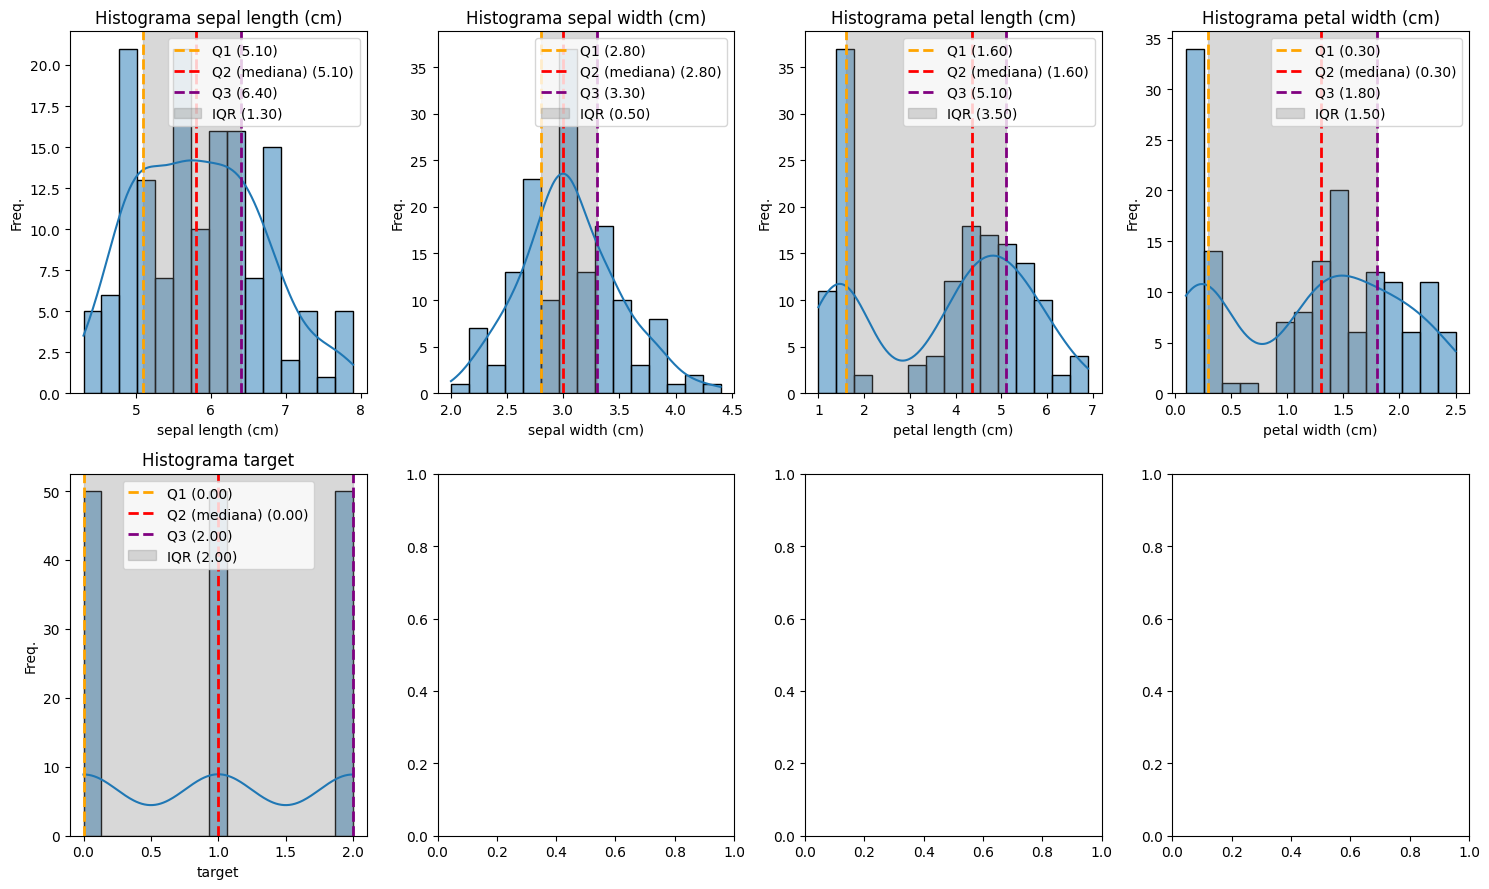

In [34]:
from utils.eda_utils import graficar_histogramas, obtener_columnas_numericas_df

columnas_numericas = obtener_columnas_numericas_df(df)

graficar_histogramas(df, columnas_numericas, nro_columnas=4, kde=True, bins=15, figsize=(15, 9))

Gráficos de dispersión.

/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/seaborn/axisgrid.

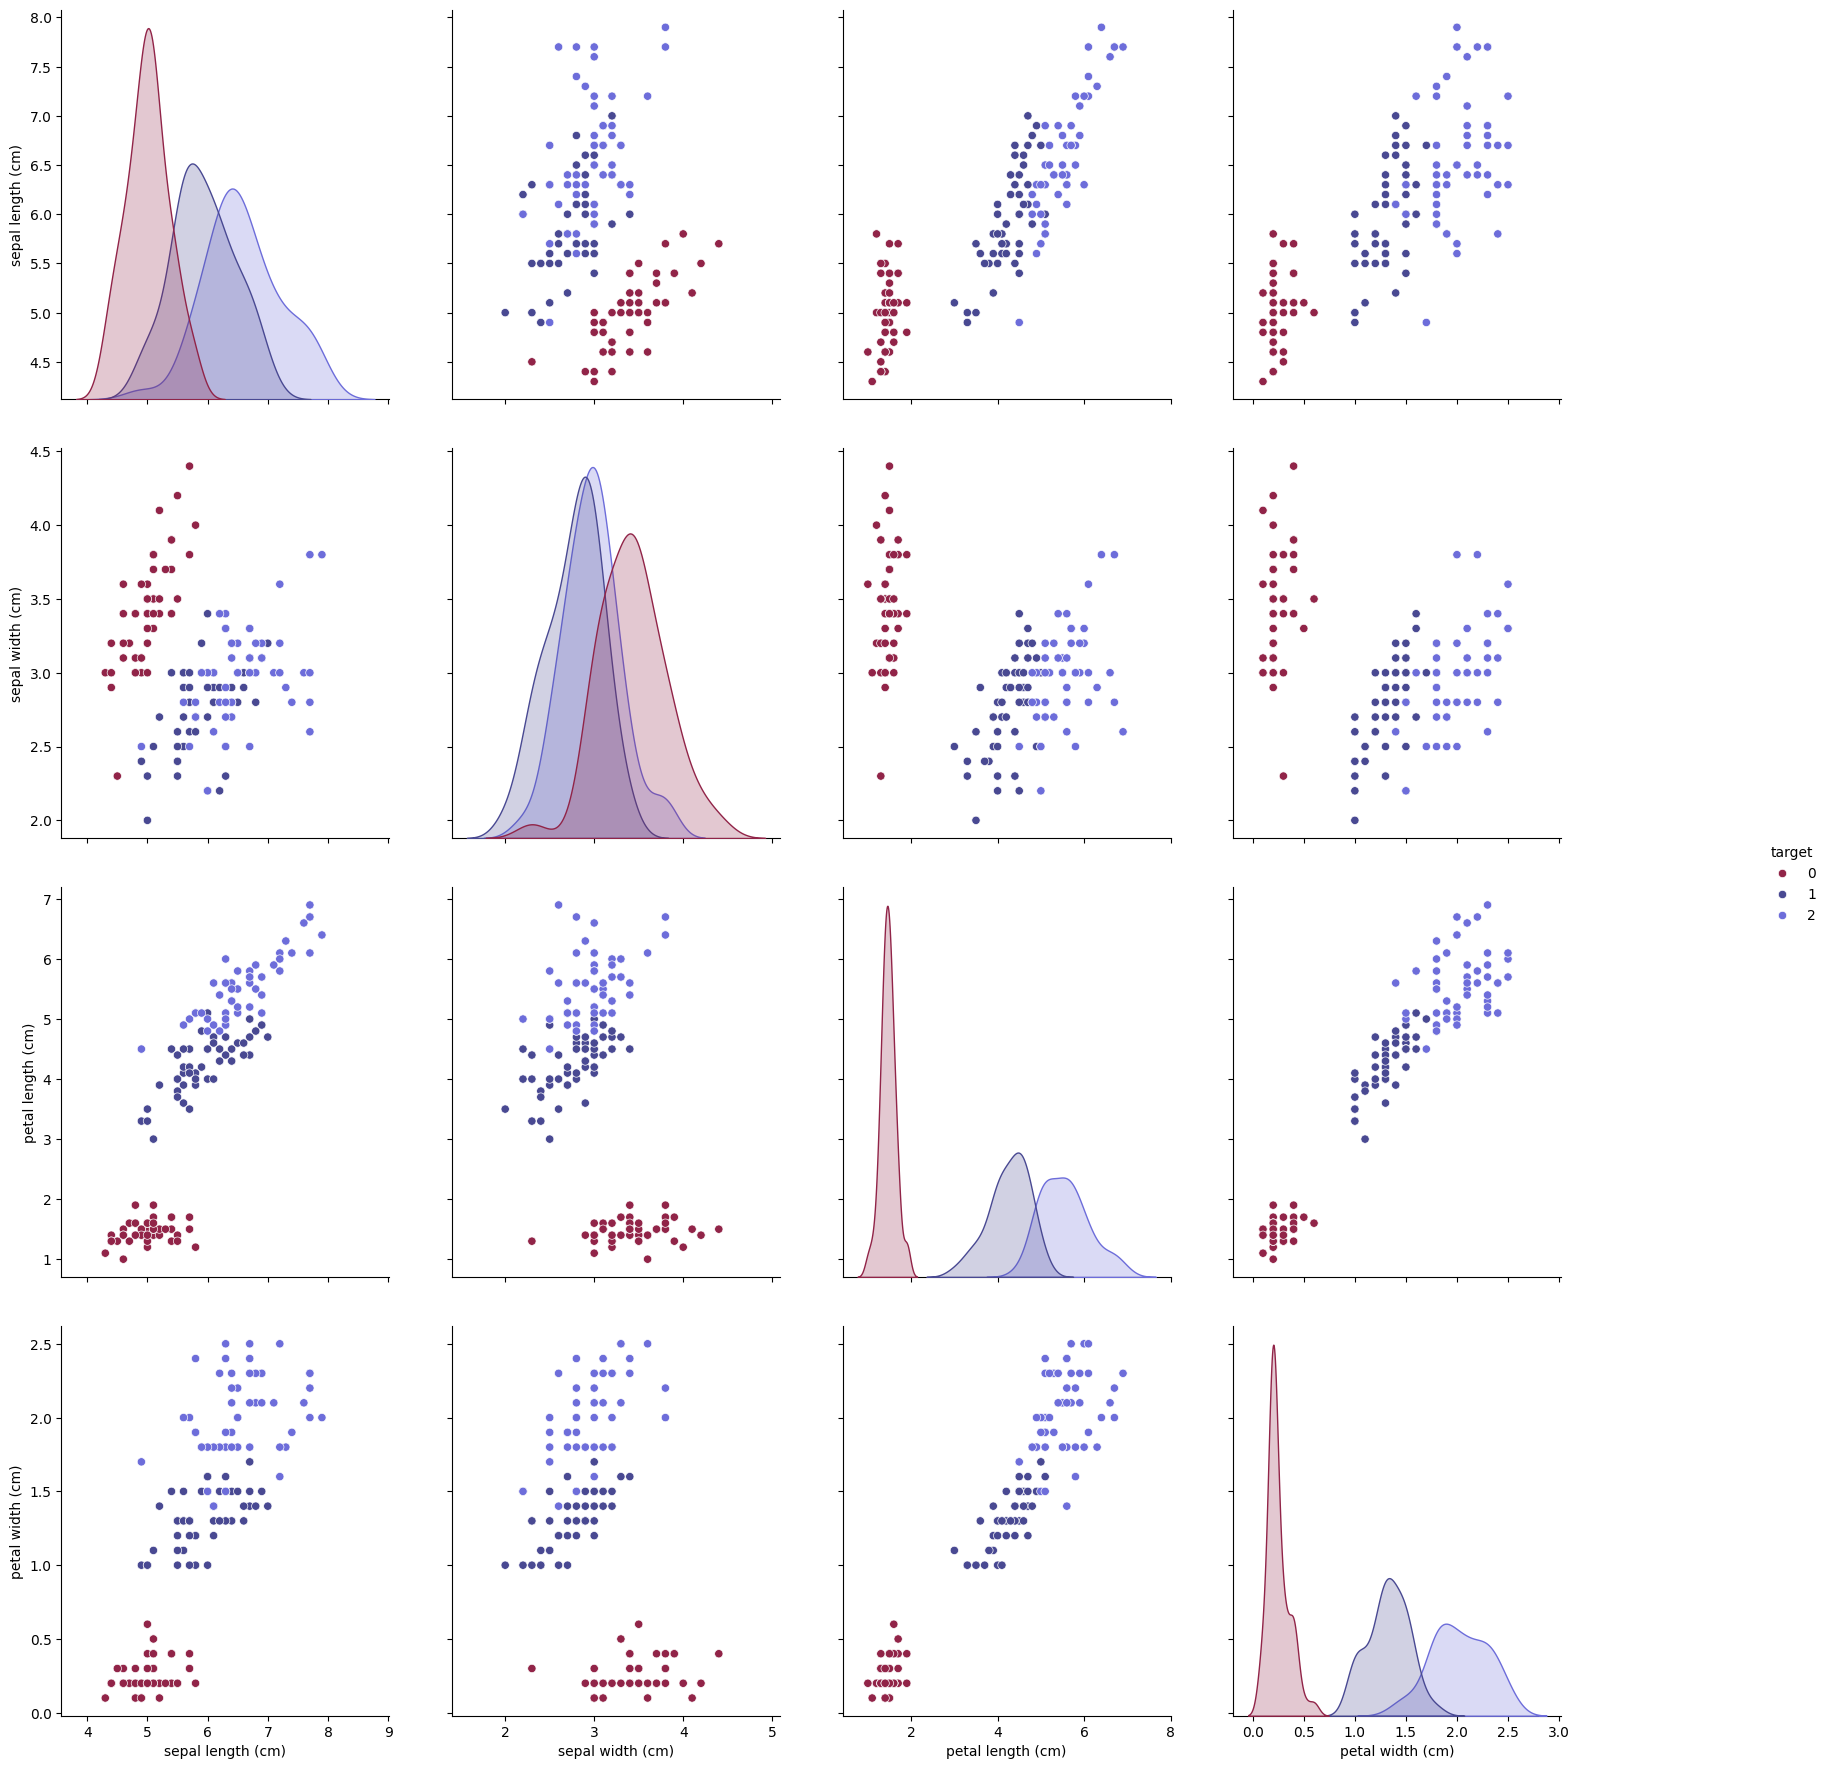

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

palette = sns.color_palette("gist_stern")
g = sns.pairplot(df[[*columnas_numericas]], hue="target", height=1.2, diag_kind = 'kde', palette=palette)
g.figure.set_size_inches(20, 20)
plt.show()

### Realiza una normalización de los datos, ya que PCA requiere que las características tengan la misma escala para funcionar de manera efectiva.

In [36]:
columnas_numericas = obtener_columnas_numericas_df(df)

columnas_numericas.remove("target")

In [37]:
X = df[columnas_numericas]

In [38]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


preprocessor_scale = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), columnas_numericas),
    ],
    remainder="passthrough"
)

X_scaled = preprocessor_scale.fit_transform(X)

## 3. Aplicación de PCA:

### Implementa PCA para reducir las cuatro dimensiones del dataset «Iris» a solo dos componentes principales.

In [39]:
n_components = 2
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

### Calcula la «explained variance» para estos dos componentes y discute qué porcentaje de la variabilidad total de los datos está capturada en el espacio bidimensional.

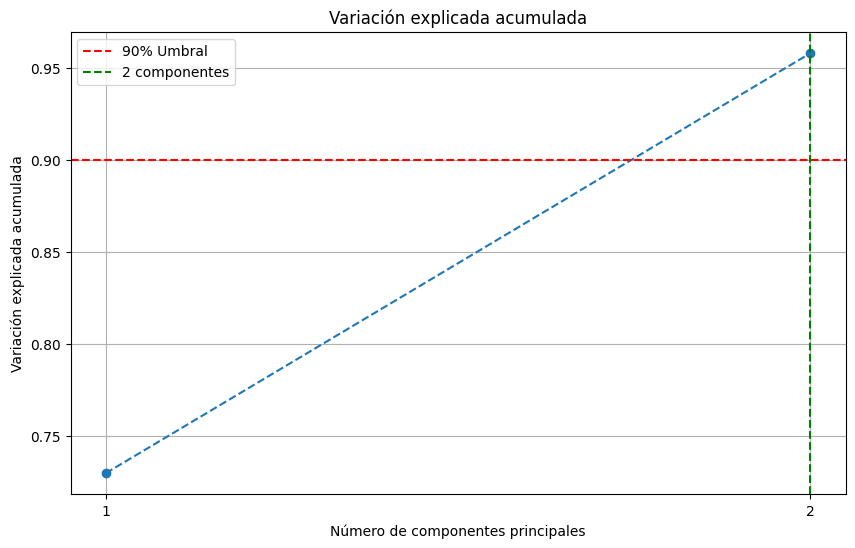

Variación explicada acumulada:
Componente 1: 72.96%
Componente 2: 95.81%


In [40]:
# Variación explicada acumulada
explained_variance_cumulative = np.cumsum(pca.explained_variance_ratio_)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components + 1), explained_variance_cumulative, marker='o', linestyle='--')
plt.title('Variación explicada acumulada')
plt.xlabel('Número de componentes principales')
plt.ylabel('Variación explicada acumulada')
plt.xticks([n + 1 for n in range(n_components)])  # Mostrar solo cada dos componentes para claridad
plt.grid(True)

# Marcar el umbral del 90% como referencia
threshold = 0.9
optimal_components = np.argmax(explained_variance_cumulative >= threshold) + 1
plt.axhline(y=threshold, color='r', linestyle='--', label=f'90% Umbral')
plt.axvline(x=optimal_components, color='g', linestyle='--', label=f'{optimal_components} componentes')

plt.legend()
plt.show()

# Mostrar la varianza explicada acumulada para cada componente
print("Variación explicada acumulada:")
for i, variance in enumerate(explained_variance_cumulative, 1):
    print(f"Componente {i}: {variance:.2%}")


## 4. Visualización de los componentes principales

### Proyecta los datos en el espacio bidimensional formado por los dos primeros componentes principales.

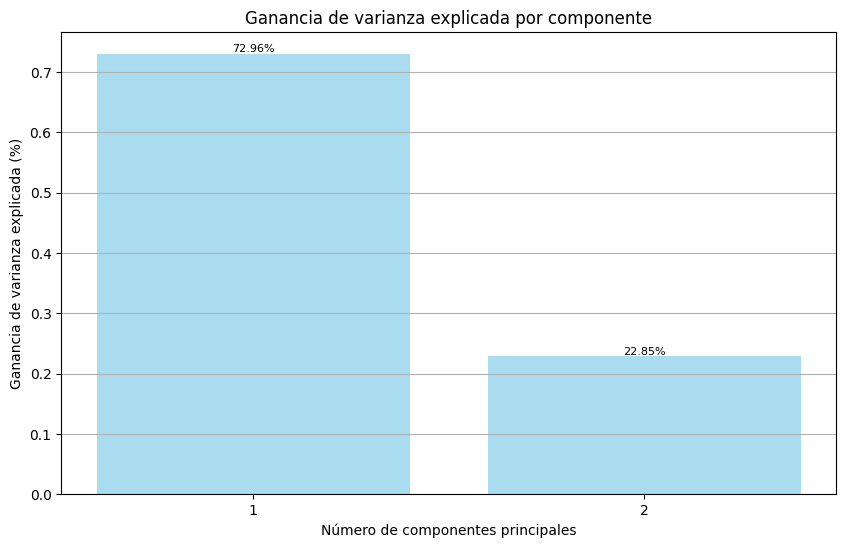

Ganancia de varianza explicada por componente:
Componente 1: 72.96%
Componente 2: 22.85%


In [41]:
explained_variance_gain = np.diff(explained_variance_cumulative, prepend=0)

# Graficar la ganancia de varianza explicada
plt.figure(figsize=(10, 6))
plt.bar(range(1, n_components + 1), explained_variance_gain, color='skyblue', alpha=0.7)
plt.title('Ganancia de varianza explicada por componente')
plt.xlabel('Número de componentes principales')
plt.ylabel('Ganancia de varianza explicada (%)')
plt.xticks(range(1, n_components + 1))  # Mostrar solo cada dos componentes para claridad
plt.grid(axis='y')

# Resaltar las primeras componentes principales más significativas
threshold_gain = 0.01  # Umbral de ganancia significativa (1%)
significant_components = [i for i, gain in enumerate(explained_variance_gain, 1) if gain > threshold_gain]
for component in significant_components:
    plt.text(component, explained_variance_gain[component - 1], f"{explained_variance_gain[component - 1]:.2%}", 
             ha='center', va='bottom', fontsize=8, color='black')

plt.show()

# Mostrar las ganancias para cada componente
print("Ganancia de varianza explicada por componente:")
for i, gain in enumerate(explained_variance_gain, 1):
    print(f"Componente {i}: {gain:.2%}")

### Utiliza diferentes colores para representar cada una de las tres clases de flores en el gráfico y observa cómo se agrupan las clases en el espacio de los componentes principales.

In [42]:
df["target_name"].unique().tolist()

[np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]

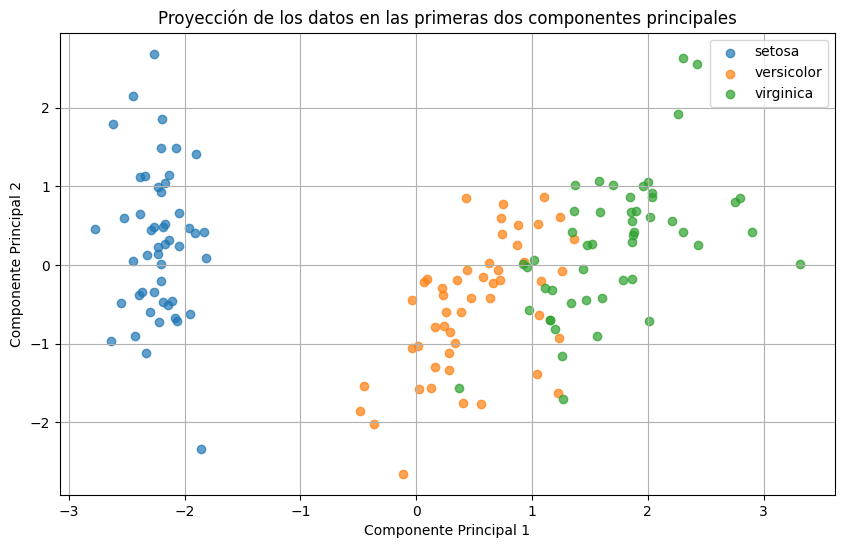

In [43]:
plt.figure(figsize=(10, 6))
for target_name in df["target_name"].unique().tolist():
    subset = X_pca[df["target_name"] == target_name][:, :2]  # Usar solo las primeras 2 componentes
    plt.scatter(subset[:, 0], subset[:, 1], label=target_name, alpha=0.7)

plt.title('Proyección de los datos en las primeras dos componentes principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)
plt.show()

## 5. Interpretación de los resultados:

### Analiza los coeficientes de los dos componentes principales y explica qué variables tienen la mayor influencia en estos.

In [44]:
loadings = pd.DataFrame(
    pca.components_.T,  # Transponer para tener variables como filas
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=columnas_numericas
)

# Mostrar resultados
print("Coeficientes (loadings) de cada componente principal:")
print(loadings)

# Analizar las variables más influyentes
for i in range(pca.n_components_):
    most_influential = loadings[f'PC{i+1}'].abs().idxmax()
    print(f"La variable más influyente en PC{i+1} es: {most_influential}")

Coeficientes (loadings) de cada componente principal:
                        PC1       PC2
sepal length (cm)  0.521066  0.377418
sepal width (cm)  -0.269347  0.923296
petal length (cm)  0.580413  0.024492
petal width (cm)   0.564857  0.066942
La variable más influyente en PC1 es: petal length (cm)
La variable más influyente en PC2 es: sepal width (cm)


### Discute si PCA es capaz de separar correctamente las clases y cómo este análisis puede mejorar la comprensión de los datos.

Según los gráficos de componentes principales, el método puede mantener el 90% de la varianza acumulada solamente usando 2 componentes o features. Esta disminución en cantidad de componentes se traduce en menores tiempos de entrenamiento, y también facilita la visualización y análisis de patrones en los datos.